# Workshop: Data Analytics

### Objetivo de hoy

2018: Estamos lanzando una startup PropTech. Necesitamos recolectar información sobre los arriendos en Santiago. 

![Se arriendo](./Arriendo.jpeg)

👉 Nuestra idea: entrar en [Portal Inmobiliario](https://www.portalinmobiliario.com) y sacar toda la info!

> A mano? 😳 🤯

> Definitivamente NO! 😉

Para eso, necesitaremos aprender sobre:

- Estructura de datos en *Python*: listas y diccionarios
- Recolección de datos utilizando WebScraping (bs4)
- Visualización utilizando librerías de Python (Plotly / Seaborn)
- Ejemplo de *no code*

### Estructura de Datos

**Listas**

- Indice (posición)
- Puedo leer, agregar, modificar o eliminar

In [47]:
students = ["Sebas", "Fede", "Camila"]

In [48]:
age = [32, 28, 26]

In [49]:
age[1]

28

**Diccionarios**

- Parejas: `clave` : `valor`
- No tiene indices
- Las claves son únicas

In [50]:
sebas = {'name': 'Sebas', 'age': 32}

In [52]:
sebas['age']

32

**Entonces...**

In [5]:
students = [
    {'name': 'Sebas', 'age': 32},
    {'name': 'Fede', 'age': 29},
    {'name': 'Camila', 'age': 26}
]

In [ ]:
apartments = [
    {"price": 100, "room": 2, "size": 50, "address": "El Golf 50, Las Condes"},
    {"price": 200, "room": 1, "size": 30, "address": "El Golf 80, Las Condes"},
]

### Web 101

![HTTP Request](./Web.png)

---

![HTML Tag](./Tags.png)

### OK, let's go!

##### Importamos la librerías de Python que necesitamos

In [53]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import re

Pedido de información a la web:

In [54]:
url = "https://www.portalinmobiliario.com/arriendo/departamento/santiago-metropolitana/"
response = requests.get(url)
soup = BeautifulSoup(response.content)

**Formato de árbol**

![htmltree](./htmltree.png)

In [57]:
pages = np.arange(1, 34*50, 50).tolist()

##### Funcion de recolección

In [59]:
def transform_html_to_data(soup):
    apartments_data = soup.find_all(class_='ui-search-layout__item')
    apartments = []
    for apartment in apartments_data:
        price = apartment.find('span', class_='andes-money-amount__fraction').text
        price = int(price.replace(".", ""))
        address = apartment.find(class_='ui-search-item__group__element ui-search-item__location shops__items-group-details').text
        space_information = apartment.find(class_='ui-search-item__group ui-search-item__group--attributes shops__items-group').text
        if space_information:
            size = re.search(r'(\d+) m', space_information)
            if size:
                size = int(size.group(1))
            rooms = re.search(r'(\d+) dormitorio', space_information)
            if rooms:
                rooms = int(rooms.group(1))
        data = {'price (CLP)': price, 'rooms': rooms, 'size (m2)': size, 'address': address}
        apartments.append(data)

    return apartments

![card](./card.png)

##### Iteramos según cuantas `pages` haya disponibles

In [ ]:
apartments = [
    {"price": 100, "room": 2, "size": 50, "address": "El Golf 50, Las Condes"},
    {"price": 200, "room": 1, "size": 30, "address": "El Golf 80, Las Condes"},
]

In [60]:
apartments_list = []
for page in pages:
    url = f"https://www.portalinmobiliario.com/arriendo/departamento/santiago-metropolitana/_Desde_{page}_NoIndex_True"
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    apartments_list += transform_html_to_data(soup)

**Cuantos departamentos pudimos recuperar?**

In [61]:
len(apartments_list)

1699

In [62]:
apartments_list

[{'price (CLP)': 256608,
  'rooms': 2,
  'size (m2)': 66,
  'address': 'Santo Domingo 3251, Santiago, Chile, Barrio Yungay, Santiago'},
 {'price (CLP)': 320000,
  'rooms': 1,
  'size (m2)': 29,
  'address': 'Chacabuco 1120, Parque Los Reyes, Santiago'},
 {'price (CLP)': 305000,
  'rooms': 1,
  'size (m2)': 26,
  'address': 'Carmen 110, Santa Isabel, Santiago'},
 {'price (CLP)': 280000,
  'rooms': 1,
  'size (m2)': 29,
  'address': 'Amunátegui 620, Centro Histórico De Santiago, Santiago'},
 {'price (CLP)': 380000,
  'rooms': 2,
  'size (m2)': 32,
  'address': 'Manuel Antonio Matta 524, Bogotá - Sierra Bella, Santiago'},
 {'price (CLP)': 280000,
  'rooms': 1,
  'size (m2)': 29,
  'address': 'General Mackenna 1490, Centro Histórico De Santiago, Santiago'},
 {'price (CLP)': 390000,
  'rooms': 2,
  'size (m2)': 32,
  'address': 'Manuel Antonio Matta 524, Bogotá - Sierra Bella, Santiago'},
 {'price (CLP)': 385000,
  'rooms': 2,
  'size (m2)': 32,
  'address': 'Manuel Antonio Matta 524, Bogot

##### Transformamos los datos a un DataFrame

In [63]:
import pandas as pd

In [64]:
df = pd.DataFrame(apartments_list)
df.head()

,price (CLP),rooms,size (m2),address
0,256608,2.0,66.0,"Santo Domingo 3251, Santiago, Chile, Barrio Yu..."
1,320000,1.0,29.0,"Chacabuco 1120, Parque Los Reyes, Santiago"
2,305000,1.0,26.0,"Carmen 110, Santa Isabel, Santiago"
3,280000,1.0,29.0,"Amunátegui 620, Centro Histórico De Santiago, ..."
4,380000,2.0,32.0,"Manuel Antonio Matta 524, Bogotá - Sierra Bell..."


In [65]:
df.shape

(1699, 4)

##### Limpiamos la información

- Falta de información

In [66]:
df.isna().sum()

price (CLP)     0
rooms          13
size (m2)      11
address         0
dtype: int64

In [67]:
df.dropna(inplace=True)
df.shape

(1675, 4)

- Outliers

> Precio de arriendo menor a 2.5 MCLP

In [68]:
condition = df['price (CLP)'] < 2_500_000
df = df[condition]

In [69]:
df.shape

(1673, 4)

> Precio mayor a 1000 CLP

In [70]:
condition = df['price (CLP)'] > 1000
df = df[condition]

In [71]:
df.shape

(1620, 4)

> Menos de 5 piezas

In [72]:
condition = df['rooms'] < 5 
df = df[condition]

In [73]:
df.shape

(1617, 4)

### Data Visualization

In [74]:
import seaborn as sns
import plotly.express as px

In [75]:
fig = px.scatter(df, x="size (m2)", y="price (CLP)", size="rooms", title="Precio vs. Tamaño", width=800, height=400)
fig.show()

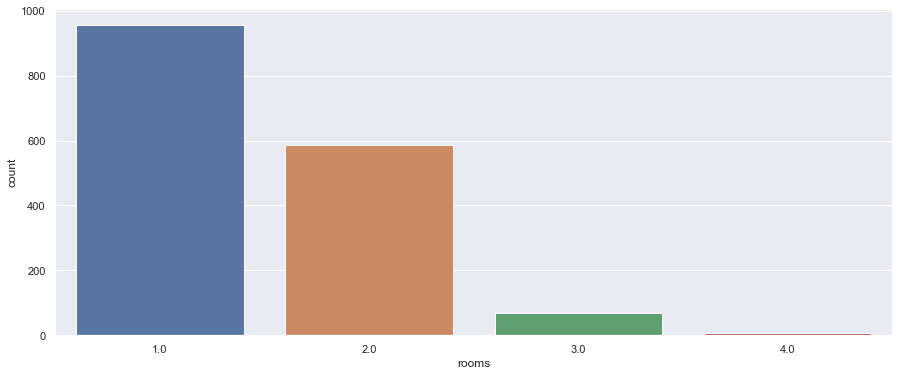

In [76]:
sns.countplot(x="rooms", data=df)
sns.set(rc={'figure.figsize':(15, 6)})

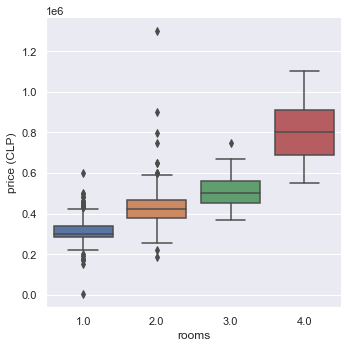

In [77]:
sns.catplot(x='rooms', y='price (CLP)', data=df, kind="box")

<AxesSubplot:xlabel='size (m2)', ylabel='price (CLP)'>

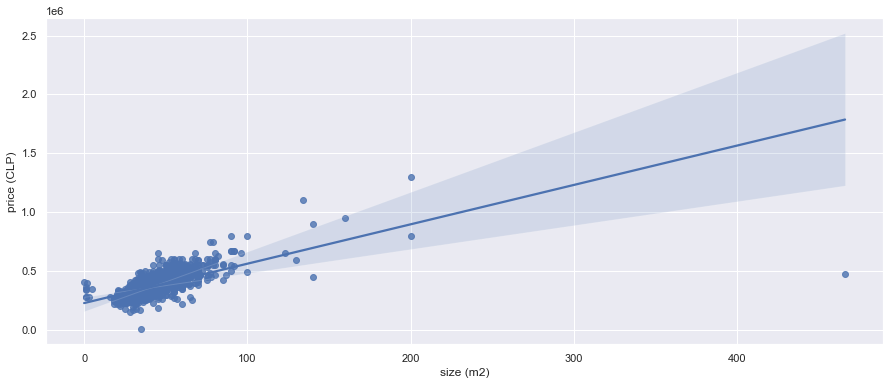

In [78]:
sns.regplot(x='size (m2)', y='price (CLP)', data=df)

In [79]:
condition = df['size (m2)'] < 130
df_max_size_200 = df[condition]

In [80]:
df.shape

(1617, 4)

In [81]:
df_max_size_200.shape

(1609, 4)

<AxesSubplot:xlabel='size (m2)', ylabel='price (CLP)'>

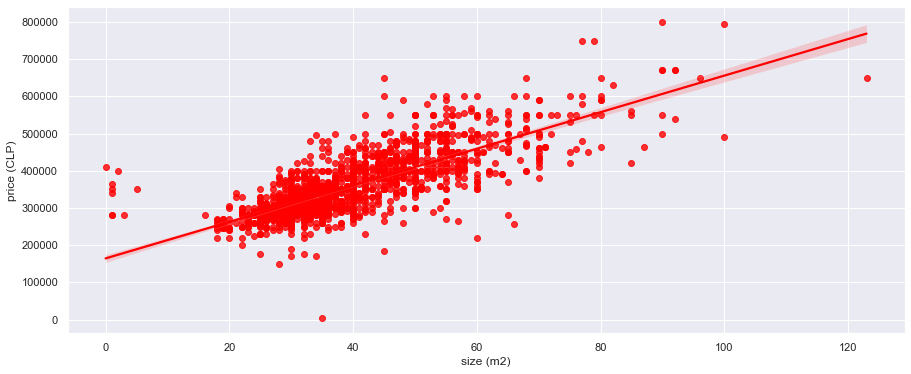

In [83]:
sns.regplot(x='size (m2)', y='price (CLP)', data=df_max_size_200, color='red')

##### Exportemos a CSV

Aprovechando la librería de **Pandas**, utilizamos solo `.to_csv()`

In [84]:
df_max_size_200.to_csv('./RegionMetropolitana.csv')

### OK, let's do `NO CODE`

[Browse AI](https://dashboard.browse.ai/tasks)